In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('testjobs.csv')

In [35]:
df.shape

(57, 12)

In [36]:
df.columns

Index(['Job_Title', 'Job_Link', 'Job_Type', 'Job_Duration', 'Job_Description',
       'Proposals', 'Amount', 'Country', 'Score', 'Rating', 'Reviews',
       'Budget'],
      dtype='object')

In [37]:
df.head(3)

,Job_Title,Job_Link,Job_Type,Job_Duration,Job_Description,Proposals,Amount,Country,Score,Rating,Reviews,Budget
0,AI System: Draw an Architecture Diagram,https://www.upwork.com/jobs/System-Draw-Archit...,Hourly: $15-$40,"Less than 1 month, Less than 30 hrs/week",I need someone to draw an architecture diagram...,10 to 15,500.0,United States,4.0,NaN,NaN,NaN
1,Machine Learning Expert Needed for Consultation,https://www.upwork.com/jobs/Machine-Learning-E...,Hourly: $25-$40,"Less than 1 month, Less than 30 hrs/week",An ML expert is needed for thesis consultation...,15 to 20,200.0,Nigeria,0.0,5.00,26.0,NaN
2,AI expert to develop system to recruit patients,https://www.upwork.com/jobs/expert-develop-sys...,Hourly,"Less than 1 month, Less than 30 hrs/week",I need an AI expert to develop an AI-based sys...,10 to 15,0.0,United States,1.0,4.93,4.0,NaN


In [40]:
# Function to extract upper limit from the range or handle 'Less than 5'
def extract_upper_limit(proposal_range):
    if 'Less than' in proposal_range:
        return 5  # Replace 'Less than 5' with 5
    else:
        upper_limit = int(proposal_range.split(' to ')[-1])  # Extract upper limit from 'x to y'
        return upper_limit

# Apply the function to create 'Proposals_new' column
df['Proposals_new'] = df['Proposals'].apply(extract_upper_limit)

# Display the updated DataFrame
df.head(3)


,Job_Title,Job_Link,Job_Type,Job_Duration,Job_Description,Proposals,Amount,Country,Score,Rating,Reviews,Budget,Proposals_new
0,AI System: Draw an Architecture Diagram,https://www.upwork.com/jobs/System-Draw-Archit...,Hourly: $15-$40,"Less than 1 month, Less than 30 hrs/week",I need someone to draw an architecture diagram...,10 to 15,500.0,United States,4.0,NaN,NaN,NaN,15
1,Machine Learning Expert Needed for Consultation,https://www.upwork.com/jobs/Machine-Learning-E...,Hourly: $25-$40,"Less than 1 month, Less than 30 hrs/week",An ML expert is needed for thesis consultation...,15 to 20,200.0,Nigeria,0.0,5.00,26.0,NaN,20
2,AI expert to develop system to recruit patients,https://www.upwork.com/jobs/expert-develop-sys...,Hourly,"Less than 1 month, Less than 30 hrs/week",I need an AI expert to develop an AI-based sys...,10 to 15,0.0,United States,1.0,4.93,4.0,NaN,15


In [41]:
# Calculate the ratio of Budget to Proposals
df['Budget_Proposal_Ratio'] = (df['Budget'] / df['Proposals_new']).round()

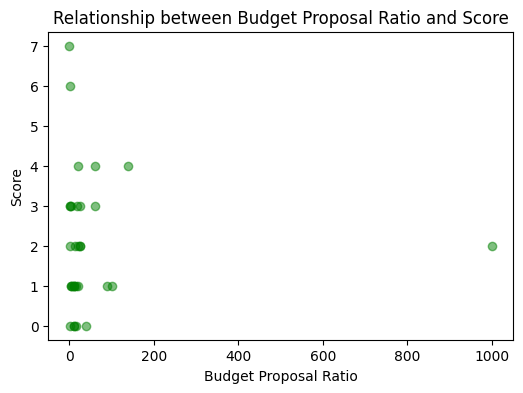

In [73]:
# A higher ratio might suggest higher competition among freelancers for a given budget.

plt.figure(figsize=(6, 4))
plt.scatter(df['Budget_Proposal_Ratio'], df['Score'], alpha=0.5, color='green')
plt.xlabel('Budget Proposal Ratio')
plt.ylabel('Score')
plt.title('Relationship between Budget Proposal Ratio and Score')
plt.show()


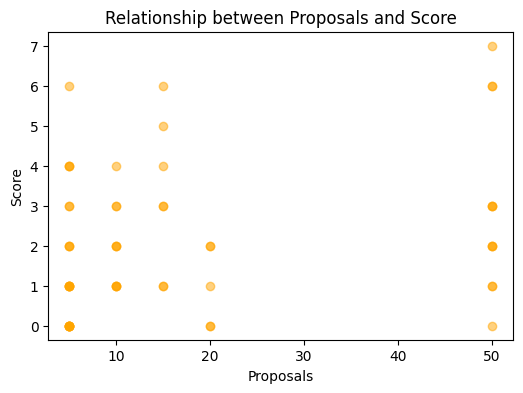

In [43]:
# Scatter plot of 'Proposals' vs 'Score'
plt.figure(figsize=(6, 4))
plt.scatter(df['Proposals_new'], df['Score'], alpha=0.5, color='orange')
plt.xlabel('Proposals')
plt.ylabel('Score')
plt.title('Relationship between Proposals and Score')
plt.show()


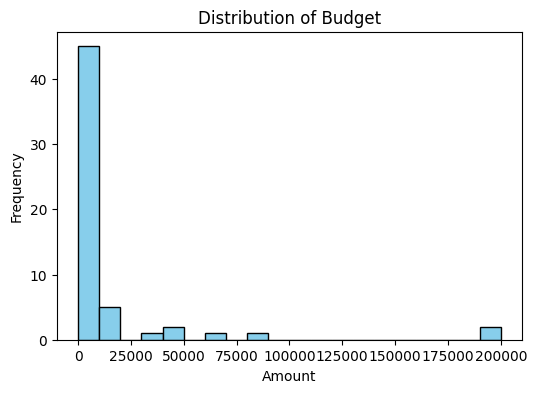

In [33]:
import matplotlib.pyplot as plt

# Histogram of 'Amount' distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Amount'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.show()


In [71]:
# Split the 'Job_Type' column at ':' and keep only the first part
df['Job_Type'] = df['Job_Type'].str.split(':').str[0]

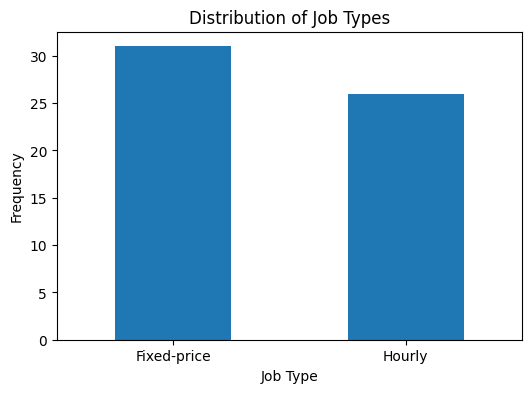

In [70]:
# Plotting a bar chart for the 'Job_Type' data

counts = df['Job_Type'].value_counts()
plt.figure(figsize=(6, 4))
counts.plot(kind='bar')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.title('Distribution of Job Types')
plt.xticks(rotation=0)
plt.show()


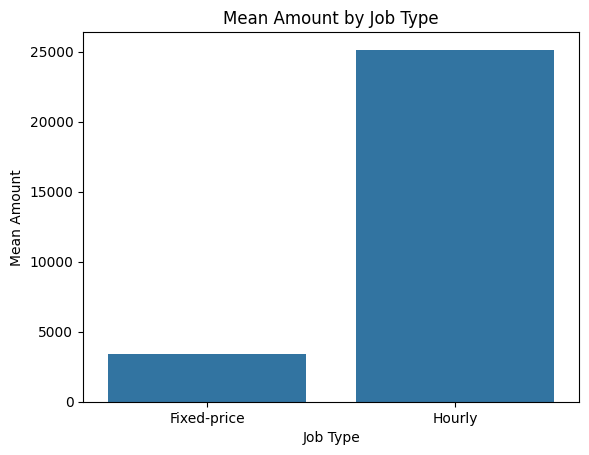

In [83]:
mean_amount = df.groupby('Job_Type')['Amount'].mean().reset_index()

sns.barplot(x='Job_Type', y='Amount', data=mean_amount)
plt.xlabel('Job Type')
plt.ylabel('Mean Amount')
plt.title('Mean Amount by Job Type')
plt.show()
